In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v10/v10_updated_V1.6.xlsx", sheet_name = 'v10_orig')
data.head()

,OpportunityID,CreatedDate,FundedDate,OpportunityName,Priordeal_OppID,Renewal_PreviousCollectionStatus,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,...,Industry,Industry_Group__c,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,TwoMonthAvg_AdjustedMonthlyDeposits,AdjustedMonthlyDeposits,drop_percent,Drop_category
0,0062M00000gZQK1QAO,2019-07-25 19:49:19,2019-07-26,Carlos Reynaldo Mortgage-Renewal Deal-07252019,0062M00000ePi8BQAS,Other,90.00,0.60,562.0,1.0,...,"Finance, Insurance, Real Estate",61 - Non-Depository Credit Institutions,0.0,0.0,0.069956,0.443443,11505.0000,13166.0,14.437201,Positive
1,0062M00000lvWxEQAU,2021-02-01 17:46:02,2021-02-02,Killer Wraps-Renewal Deal-02012021,0062M00000lWKDFQA4,Default,96.88,0.78,589.0,1.0,...,Services,"75 - Automotive Repair, Services, and Parking",0.0,NaN,-0.304281,0.087639,21853.8900,22175.9,1.473467,Positive
2,0062M00000kxPSSQA2,2020-07-15 16:00:42,2020-07-17,Merchants Electric Co-Renewal Deal-07152020,0062M00000jxrOCQAY,Other,100.00,0.70,657.0,2.0,...,Construction,17 - Construction Special Trade Contractors,0.0,0.0,0.075910,0.073277,132149.9125,110731.0,-16.208039,Negative
3,0062M00000nYGw3QAG,2021-10-01 13:43:25,2021-10-04,Epoxy Coating Specialist-Renewal Deal-10012021,0062M00000n1yAHQAY,Other,96.97,0.73,0.0,2.0,...,Construction,17 - Construction Special Trade Contractors,0.0,0.0,-0.677518,0.403069,22070.0000,6980.0,-68.373357,Negative
4,0062M00000isCZRQA2,2020-01-02 18:04:55,2020-01-17,Joe's Trucking-Renewal Deal-01022020,0062M00000eRgmFQAS,Default,100.00,1.28,556.0,5.0,...,Transportation & Public Utilities,42 - Motor Freight Transportation and Warehousing,7.0,12.0,0.248458,0.011868,140601.5000,57352.0,-59.209539,Negative


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   OpportunityID                              3140 non-null   object        
 1   CreatedDate                                3140 non-null   datetime64[ns]
 2   FundedDate                                 3140 non-null   datetime64[ns]
 3   OpportunityName                            3140 non-null   object        
 4   Priordeal_OppID                            3140 non-null   object        
 5   Renewal_PreviousCollectionStatus           3140 non-null   object        
 6   Renewal_PreviousPace                       3128 non-null   float64       
 7   Renewal_PreviousPaidPercentageOfRTR        3128 non-null   float64       
 8   Renewal_PreviousCreditScore                3106 non-null   float64       
 9   Renewal_CountPrevio

Analysing different attributes year wise w.r.t Number of bank statements as no. of bank statements is suspiciously predictive

In [ ]:
import datetime as dt

In [ ]:
data_2019 = data[data['FundedDate'].dt.year == 2019]
data_2020 = data[data['FundedDate'].dt.year == 2020]
data_2021 = data[data['FundedDate'].dt.year == 2021]

In [ ]:
print('2019 value counts for bank statements = 4\n',data_2019[data['NumberOfBankStatements']==4]['WriteOff_YN'].value_counts())
print('2020 value counts for bank statements = 4\n',data_2020[data['NumberOfBankStatements']==4]['WriteOff_YN'].value_counts())
print('2021 value counts for bank statements = 4\n',data_2021[data['NumberOfBankStatements']==4]['WriteOff_YN'].value_counts())

2019 value counts for bank statements = 4
 0.0    245
1.0      9
Name: WriteOff_YN, dtype: int64
2020 value counts for bank statements = 4
 0.0    396
1.0     22
Name: WriteOff_YN, dtype: int64
2021 value counts for bank statements = 4
 0.0    698
1.0     81
Name: WriteOff_YN, dtype: int64


In [ ]:
print('2019 value counts for bank statements = 3\n',data_2019[data['NumberOfBankStatements']==3]['WriteOff_YN'].value_counts())
print('2020 value counts for bank statements = 3\n',data_2020[data['NumberOfBankStatements']==3]['WriteOff_YN'].value_counts())
print('2021 value counts for bank statements = 3\n',data_2021[data['NumberOfBankStatements']==3]['WriteOff_YN'].value_counts())

2019 value counts for bank statements = 3
 0.0    208
1.0    183
Name: WriteOff_YN, dtype: int64
2020 value counts for bank statements = 3
 0.0    340
1.0    168
Name: WriteOff_YN, dtype: int64
2021 value counts for bank statements = 3
 0.0    349
1.0    307
Name: WriteOff_YN, dtype: int64


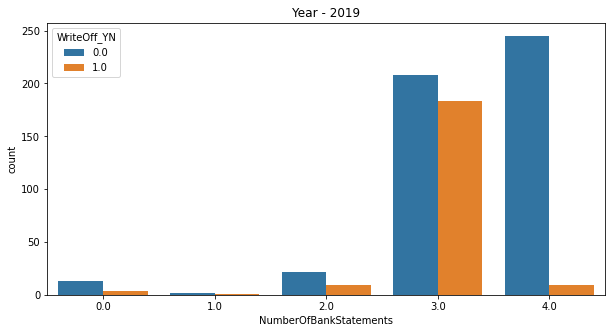

In [ ]:
plt.figure(figsize = (10,5))
plt.title('Year - 2019')
sns.countplot(data_2019['NumberOfBankStatements'],hue = data_2019['WriteOff_YN'])

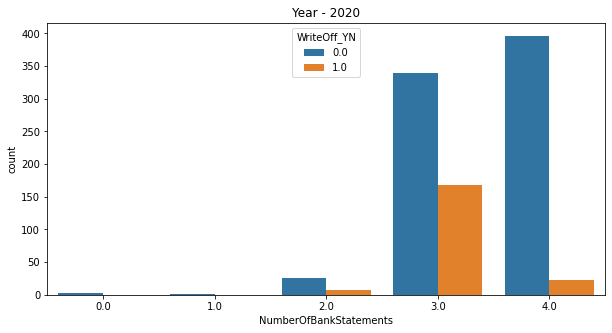

In [ ]:
plt.figure(figsize = (10,5))
plt.title('Year - 2020')
sns.countplot(data_2020['NumberOfBankStatements'],hue = data_2020['WriteOff_YN'])

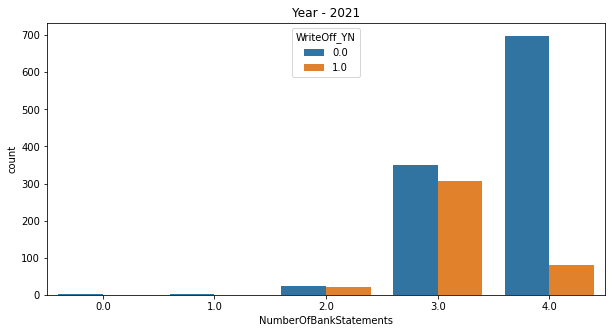

In [ ]:
plt.figure(figsize = (10,5))
plt.title('Year - 2021')
sns.countplot(data_2021['NumberOfBankStatements'],hue = data_2021['WriteOff_YN'])

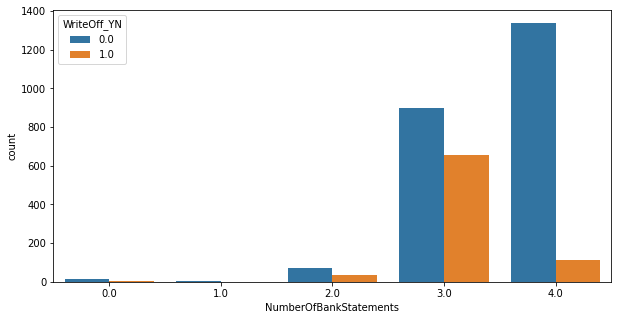

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data['NumberOfBankStatements'],hue = data['WriteOff_YN'])

In [ ]:
data[data['NumberOfBankStatements']==4]['FundedAmount'].sum()

28653660.0

Analysing different attributes w.r.t no_of_bank_statements

In [ ]:
#Credit Score w.r.t. Number of bank statements
print('Mean credit score for bank statements = 4 == ',data[data['NumberOfBankStatements']==4]['Credit_Score__c'].mean())
print('Mean credit score for bank statements = 3 == ',data[data['NumberOfBankStatements']==3]['Credit_Score__c'].mean())
print('Mean credit score for bank statements = 2 == ',data[data['NumberOfBankStatements']==2]['Credit_Score__c'].mean())
print('Mean credit score for bank statements = 1 == ',data[data['NumberOfBankStatements']==1]['Credit_Score__c'].mean())
print('Mean credit score for bank statements = 0 == ',data[data['NumberOfBankStatements']==0]['Credit_Score__c'].mean())
# print(data[data['NumberOfBankStatements']==4]['CreditScore'].mean()*100/data['FundedAmount'].sum())

Mean credit score for bank statements = 4 ==  545.5304287690179
Mean credit score for bank statements = 3 ==  552.9974226804123
Mean credit score for bank statements = 2 ==  564.2735849056604
Mean credit score for bank statements = 1 ==  555.6
Mean credit score for bank statements = 0 ==  503.3157894736842


In [ ]:
# BBC position
print('Mean BBC position for bank statements = 4 == ',data[data['NumberOfBankStatements']==4]['BBC_Position__c'].mean())
print('Mean BBC position for bank statements = 3 == ',data[data['NumberOfBankStatements']==3]['BBC_Position__c'].mean())
print('Mean BBC position for bank statements = 2 == ',data[data['NumberOfBankStatements']==2]['BBC_Position__c'].mean())
print('Mean BBC position for bank statements = 1 == ',data[data['NumberOfBankStatements']==1]['BBC_Position__c'].mean())
print('Mean BBC position for bank statements = 0 == ',data[data['NumberOfBankStatements']==0]['BBC_Position__c'].mean())

Mean BBC position for bank statements = 4 ==  1.988973121984838
Mean BBC position for bank statements = 3 ==  1.945407835581246
Mean BBC position for bank statements = 2 ==  1.7850467289719627
Mean BBC position for bank statements = 1 ==  2.8
Mean BBC position for bank statements = 0 ==  2.05


In [ ]:
# Time in business ,slight difference observed
print('Mean Time_in_Business__c for bank statements = 4 == ',data[data['NumberOfBankStatements']==4]['Time_in_Business__c'].mean())
print('Mean Time_in_Business__c for bank statements = 3 == ',data[data['NumberOfBankStatements']==3]['Time_in_Business__c'].mean())
print('Mean Time_in_Business__c for bank statements = 2 == ',data[data['NumberOfBankStatements']==2]['Time_in_Business__c'].mean())
print('Mean Time_in_Business__c for bank statements = 1 == ',data[data['NumberOfBankStatements']==1]['Time_in_Business__c'].mean())
print('Mean Time_in_Business__c for bank statements = 0 == ',data[data['NumberOfBankStatements']==0]['Time_in_Business__c'].mean())

Mean Time_in_Business__c for bank statements = 4 ==  8.010117160578911
Mean Time_in_Business__c for bank statements = 3 ==  7.208599871547848
Mean Time_in_Business__c for bank statements = 2 ==  7.231401869158878
Mean Time_in_Business__c for bank statements = 1 ==  5.386
Mean Time_in_Business__c for bank statements = 0 ==  9.831


In [ ]:
# Bank Statement_MA_Overdraft days,slight difference observed
print('Mean LastBankStatement_OverdraftDays for bank statements = 4 == ',data[data['NumberOfBankStatements']==4]['LastBankStatement_OverdraftDays'].mean())
print('Mean LastBankStatement_OverdraftDays for bank statements = 3 == ',data[data['NumberOfBankStatements']==3]['LastBankStatement_OverdraftDays'].mean())
print('Mean LastBankStatement_OverdraftDays for bank statements = 2 == ',data[data['NumberOfBankStatements']==2]['LastBankStatement_OverdraftDays'].mean())
print('Mean LastBankStatement_OverdraftDays for bank statements = 1 == ',data[data['NumberOfBankStatements']==1]['LastBankStatement_OverdraftDays'].mean())
print('Mean LastBankStatement_OverdraftDays for bank statements = 0 == ',data[data['NumberOfBankStatements']==0]['LastBankStatement_OverdraftDays'].mean())

Mean LastBankStatement_OverdraftDays for bank statements = 4 ==  1.73552290406223
Mean LastBankStatement_OverdraftDays for bank statements = 3 ==  2.0061674008810573
Mean LastBankStatement_OverdraftDays for bank statements = 2 ==  1.7922077922077921
Mean LastBankStatement_OverdraftDays for bank statements = 1 ==  5.0
Mean LastBankStatement_OverdraftDays for bank statements = 0 ==  0.0


In [15]:
print('Mean Last3Statments_MA_AvgDailyBalance for bank statements = 4 == ',data[data['NumberOfBankStatements']==4]['Last3Statments_MA_AvgDailyBalance'].mean())
print('Mean Last3Statments_MA_AvgDailyBalance for bank statements = 3 == ',data[data['NumberOfBankStatements']==3]['Last3Statments_MA_AvgDailyBalance'].mean())
print('Mean Last3Statments_MA_AvgDailyBalance for bank statements = 2 == ',data[data['NumberOfBankStatements']==2]['Last3Statments_MA_AvgDailyBalance'].mean())
print('Mean Last3Statments_MA_AvgDailyBalance for bank statements = 1 == ',data[data['NumberOfBankStatements']==1]['Last3Statments_MA_AvgDailyBalance'].mean())
print('Mean Last3Statments_MA_AvgDailyBalance for bank statements = 0 == ',data[data['NumberOfBankStatements']==0]['Last3Statments_MA_AvgDailyBalance'].mean())

Mean Last3Statments_MA_AvgDailyBalance for bank statements = 4 ==  11869.581024248104
Mean Last3Statments_MA_AvgDailyBalance for bank statements = 3 ==  13155.021596797045
Mean Last3Statments_MA_AvgDailyBalance for bank statements = 2 ==  11728.573426785048
Mean Last3Statments_MA_AvgDailyBalance for bank statements = 1 ==  2160.867
Mean Last3Statments_MA_AvgDailyBalance for bank statements = 0 ==  nan


In [16]:
print('Mean Last3Statments_MA_AvgDailyBalance for bank statements = 4 == ',data[data['NumberOfBankStatements']==4]['Last3Statments_MA_AvgDailyBalance'].median())
print('Mean Last3Statments_MA_AvgDailyBalance for bank statements = 3 == ',data[data['NumberOfBankStatements']==3]['Last3Statments_MA_AvgDailyBalance'].median())
print('Mean Last3Statments_MA_AvgDailyBalance for bank statements = 2 == ',data[data['NumberOfBankStatements']==2]['Last3Statments_MA_AvgDailyBalance'].median())
print('Mean Last3Statments_MA_AvgDailyBalance for bank statements = 1 == ',data[data['NumberOfBankStatements']==1]['Last3Statments_MA_AvgDailyBalance'].median())
print('Mean Last3Statments_MA_AvgDailyBalance for bank statements = 0 == ',data[data['NumberOfBankStatements']==0]['Last3Statments_MA_AvgDailyBalance'].median())

Mean Last3Statments_MA_AvgDailyBalance for bank statements = 4 ==  3771.443333
Mean Last3Statments_MA_AvgDailyBalance for bank statements = 3 ==  3443.41
Mean Last3Statments_MA_AvgDailyBalance for bank statements = 2 ==  3960.0
Mean Last3Statments_MA_AvgDailyBalance for bank statements = 1 ==  2319.0
Mean Last3Statments_MA_AvgDailyBalance for bank statements = 0 ==  nan


In [7]:
print('Mean Last3Statments_MA_AdjustedMonthlyDeposits for bank statements = 4 == ',data[data['NumberOfBankStatements']==4]['Last3Statments_MA_AdjustedMonthlyDeposits'].median())
print('Mean Last3Statments_MA_AdjustedMonthlyDeposits for bank statements = 3 == ',data[data['NumberOfBankStatements']==3]['Last3Statments_MA_AdjustedMonthlyDeposits'].median())
print('Mean Last3Statments_MA_AdjustedMonthlyDeposits for bank statements = 2 == ',data[data['NumberOfBankStatements']==2]['Last3Statments_MA_AdjustedMonthlyDeposits'].median())
print('Mean Last3Statments_MA_AdjustedMonthlyDeposits for bank statements = 1 == ',data[data['NumberOfBankStatements']==1]['Last3Statments_MA_AdjustedMonthlyDeposits'].median())
print('Mean Last3Statments_MA_AdjustedMonthlyDeposits for bank statements = 0 == ',data[data['NumberOfBankStatements']==0]['Last3Statments_MA_AdjustedMonthlyDeposits'].median())

Mean Last3Statments_MA_AdjustedMonthlyDeposits for bank statements = 4 ==  28905.6
Mean Last3Statments_MA_AdjustedMonthlyDeposits for bank statements = 3 ==  29932.656666
Mean Last3Statments_MA_AdjustedMonthlyDeposits for bank statements = 2 ==  27845.0
Mean Last3Statments_MA_AdjustedMonthlyDeposits for bank statements = 1 ==  43486.0
Mean Last3Statments_MA_AdjustedMonthlyDeposits for bank statements = 0 ==  nan


In [8]:
print('Mean PctAvgDailybalance2AvgMonthlyDeposits for bank statements = 4 == ',data[data['NumberOfBankStatements']==4]['PctAvgDailybalance2AvgMonthlyDeposits'].median())
print('Mean PctAvgDailybalance2AvgMonthlyDeposits for bank statements = 3 == ',data[data['NumberOfBankStatements']==3]['PctAvgDailybalance2AvgMonthlyDeposits'].median())
print('Mean PctAvgDailybalance2AvgMonthlyDeposits for bank statements = 2 == ',data[data['NumberOfBankStatements']==2]['PctAvgDailybalance2AvgMonthlyDeposits'].median())
print('Mean PctAvgDailybalance2AvgMonthlyDeposits for bank statements = 1 == ',data[data['NumberOfBankStatements']==1]['PctAvgDailybalance2AvgMonthlyDeposits'].median())
print('Mean PctAvgDailybalance2AvgMonthlyDeposits for bank statements = 0 == ',data[data['NumberOfBankStatements']==0]['PctAvgDailybalance2AvgMonthlyDeposits'].median())

Mean PctAvgDailybalance2AvgMonthlyDeposits for bank statements = 4 ==  0.125662374997864
Mean PctAvgDailybalance2AvgMonthlyDeposits for bank statements = 3 ==  0.113275478835498
Mean PctAvgDailybalance2AvgMonthlyDeposits for bank statements = 2 ==  0.1167612415398
Mean PctAvgDailybalance2AvgMonthlyDeposits for bank statements = 1 ==  0.055901321022505
Mean PctAvgDailybalance2AvgMonthlyDeposits for bank statements = 0 ==  nan


In [9]:
print('Mean TwoMonthAvg_AdjustedMonthlyDeposits for bank statements = 4 == ',data[data['NumberOfBankStatements']==4]['TwoMonthAvg_AdjustedMonthlyDeposits'].median())
print('Mean TwoMonthAvg_AdjustedMonthlyDeposits for bank statements = 3 == ',data[data['NumberOfBankStatements']==3]['TwoMonthAvg_AdjustedMonthlyDeposits'].median())
print('Mean TwoMonthAvg_AdjustedMonthlyDeposits for bank statements = 2 == ',data[data['NumberOfBankStatements']==2]['TwoMonthAvg_AdjustedMonthlyDeposits'].median())
print('Mean TwoMonthAvg_AdjustedMonthlyDeposits for bank statements = 1 == ',data[data['NumberOfBankStatements']==1]['TwoMonthAvg_AdjustedMonthlyDeposits'].median())
print('Mean TwoMonthAvg_AdjustedMonthlyDeposits for bank statements = 0 == ',data[data['NumberOfBankStatements']==0]['TwoMonthAvg_AdjustedMonthlyDeposits'].median())

Mean TwoMonthAvg_AdjustedMonthlyDeposits for bank statements = 4 ==  30971.784
Mean TwoMonthAvg_AdjustedMonthlyDeposits for bank statements = 3 ==  30460.81
Mean TwoMonthAvg_AdjustedMonthlyDeposits for bank statements = 2 ==  27985.96
Mean TwoMonthAvg_AdjustedMonthlyDeposits for bank statements = 1 ==  67690.368
Mean TwoMonthAvg_AdjustedMonthlyDeposits for bank statements = 0 ==  14178.829375000001


In [10]:
print('Mean AdjustedMonthlyDeposits for bank statements = 4 == ',data[data['NumberOfBankStatements']==4]['AdjustedMonthlyDeposits'].median())
print('Mean AdjustedMonthlyDeposits for bank statements = 3 == ',data[data['NumberOfBankStatements']==3]['AdjustedMonthlyDeposits'].median())
print('Mean AdjustedMonthlyDeposits for bank statements = 2 == ',data[data['NumberOfBankStatements']==2]['AdjustedMonthlyDeposits'].median())
print('Mean AdjustedMonthlyDeposits for bank statements = 1 == ',data[data['NumberOfBankStatements']==1]['AdjustedMonthlyDeposits'].median())
print('Mean AdjustedMonthlyDeposits for bank statements = 0 == ',data[data['NumberOfBankStatements']==0]['AdjustedMonthlyDeposits'].median())

Mean AdjustedMonthlyDeposits for bank statements = 4 ==  28839.5
Mean AdjustedMonthlyDeposits for bank statements = 3 ==  29543.91
Mean AdjustedMonthlyDeposits for bank statements = 2 ==  28070.79
Mean AdjustedMonthlyDeposits for bank statements = 1 ==  35031.604999999996
Mean AdjustedMonthlyDeposits for bank statements = 0 ==  16578.5


In [11]:
print('Mean PctChangeInReveune for bank statements = 4 == ',data[data['NumberOfBankStatements']==4]['PctChangeInReveune'].median())
print('Mean PctChangeInReveune for bank statements = 3 == ',data[data['NumberOfBankStatements']==3]['PctChangeInReveune'].median())
print('Mean PctChangeInReveune for bank statements = 2 == ',data[data['NumberOfBankStatements']==2]['PctChangeInReveune'].median())
print('Mean PctChangeInReveune for bank statements = 1 == ',data[data['NumberOfBankStatements']==1]['PctChangeInReveune'].median())
print('Mean PctChangeInReveune for bank statements = 0 == ',data[data['NumberOfBankStatements']==0]['PctChangeInReveune'].median())

Mean PctChangeInReveune for bank statements = 4 ==  0.089798275251138
Mean PctChangeInReveune for bank statements = 3 ==  0.060642526799837504
Mean PctChangeInReveune for bank statements = 2 ==  0.0592145040769185
Mean PctChangeInReveune for bank statements = 1 ==  0.022384187562439997
Mean PctChangeInReveune for bank statements = 0 ==  nan


In [12]:
print('Mean Renewal_PreviousPace for bank statements = 4 == ',data[data['NumberOfBankStatements']==4]['Renewal_PreviousPace'].median())
print('Mean Renewal_PreviousPace for bank statements = 3 == ',data[data['NumberOfBankStatements']==3]['Renewal_PreviousPace'].median())
print('Mean Renewal_PreviousPace for bank statements = 2 == ',data[data['NumberOfBankStatements']==2]['Renewal_PreviousPace'].median())
print('Mean Renewal_PreviousPace for bank statements = 1 == ',data[data['NumberOfBankStatements']==1]['Renewal_PreviousPace'].median())
print('Mean Renewal_PreviousPace for bank statements = 0 == ',data[data['NumberOfBankStatements']==0]['Renewal_PreviousPace'].median())

Mean Renewal_PreviousPace for bank statements = 4 ==  100.0
Mean Renewal_PreviousPace for bank statements = 3 ==  100.0
Mean Renewal_PreviousPace for bank statements = 2 ==  100.0
Mean Renewal_PreviousPace for bank statements = 1 ==  100.0
Mean Renewal_PreviousPace for bank statements = 0 ==  100.0


In [13]:
print('Mean Renewal_PreviousPaidPercentageOfRTR for bank statements = 4 == ',data[data['NumberOfBankStatements']==4]['Renewal_PreviousPaidPercentageOfRTR'].median())
print('Mean Renewal_PreviousPaidPercentageOfRTR for bank statements = 3 == ',data[data['NumberOfBankStatements']==3]['Renewal_PreviousPaidPercentageOfRTR'].median())
print('Mean Renewal_PreviousPaidPercentageOfRTR for bank statements = 2 == ',data[data['NumberOfBankStatements']==2]['Renewal_PreviousPaidPercentageOfRTR'].median())
print('Mean Renewal_PreviousPaidPercentageOfRTR for bank statements = 1 == ',data[data['NumberOfBankStatements']==1]['Renewal_PreviousPaidPercentageOfRTR'].median())
print('Mean Renewal_PreviousPaidPercentageOfRTR for bank statements = 0 == ',data[data['NumberOfBankStatements']==0]['Renewal_PreviousPaidPercentageOfRTR'].median())

Mean Renewal_PreviousPaidPercentageOfRTR for bank statements = 4 ==  0.67
Mean Renewal_PreviousPaidPercentageOfRTR for bank statements = 3 ==  0.68
Mean Renewal_PreviousPaidPercentageOfRTR for bank statements = 2 ==  0.72
Mean Renewal_PreviousPaidPercentageOfRTR for bank statements = 1 ==  0.65
Mean Renewal_PreviousPaidPercentageOfRTR for bank statements = 0 ==  0.57


In [ ]:
# Last3Statments_MA_AvgDailyBalance    
# Last3Statments_MA_AdjustedMonthlyDeposits     
# PctAvgDailybalance2AvgMonthlyDeposits           
# TwoMonthAvg_AdjustedMonthlyDeposits         
# AdjustedMonthlyDeposits      
# PctChangeInReveune          
# Renewal_PreviousPace     
# Renewal_PreviousPaidPercentageOfRTR                           

In [ ]:
data.shape

(3140, 55)

In [ ]:
len(data.isna().sum().sort_values(ascending = False)/len(data)*100)

55

In [ ]:
data.isna().sum().sort_values(ascending = False)/len(data)*100

NetWO                                        74.171975
HBwoLCF                                      51.719745
Renewal_PreviousHBwoLCF                      38.662420
LastBankStatement_OverdraftDays              24.458599
LatestMonth_ReturnItemDays                   22.579618
PctChangeInReveune                            5.000000
Renewal_PreviousAvgDailyBalance               4.267516
Renewal_PreviousAvgMonthRevenue               4.267516
Renewal_PreviousCreditScore                   1.082803
Last3Statments_MA_ReturnItemDays              0.636943
Last3Statments_MA_AdjustedMonthlyDeposits     0.636943
Last3Months_MA_AvgDailyBalance                0.636943
Last3Months_MA_AdjustedMonthlyDeposits        0.636943
Last3Months_Sum_NumReturnItems                0.636943
Last3Months_MA_NumReturnItems                 0.636943
Last3Statments_MA_AvgDailyBalance             0.636943
PctAvgDailybalance2AvgMonthlyDeposits         0.636943
Avg_ReturnItemdays                            0.636943
Last3Month

In [ ]:
data["NumberOfBankStatements"].value_counts()

3.0    1557
4.0    1451
2.0     107
0.0      20
1.0       5
Name: NumberOfBankStatements, dtype: int64

# Check Anomalies

1. Perform EDA
2. check wos - remove missing but give in excel sheet:
3. Specifically take care of no of bank statements and all other attributes related to it:
4. Check again the pace rates - {check for extreme weird values} - min_val_check
5. Check for anomalies - time in business -ve_values
6. is this business home based - flag based  -
7. take care of features to be dropped - take previous references
8. fill the missing values - so as to keep the progress alive: 
9. EDA is completed - save the file

In [ ]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 47 

Index(['CreatedDate', 'FundedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Last3Months_MA_OverdraftDays',
       'Last3Months_MA_NumReturnItems', 'Last3Months_Sum_NumReturnItems',
       'LastBankStatement_OverdraftDays',
       'Last3Months_MA_AdjustedMonthlyDeposits',
       'Last3Months_MA_AvgDailyBalance', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'HBwoLCF', 'Contract_HoldBack__c',
       'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_Ove

In [ ]:
data.isna().sum().sort_values(ascending = False)/len(data)*100

NetWO                                        74.171975
HBwoLCF                                      51.719745
Renewal_PreviousHBwoLCF                      38.662420
LastBankStatement_OverdraftDays              24.458599
LatestMonth_ReturnItemDays                   22.579618
PctChangeInReveune                            5.000000
Renewal_PreviousAvgDailyBalance               4.267516
Renewal_PreviousAvgMonthRevenue               4.267516
Renewal_PreviousCreditScore                   1.082803
Last3Statments_MA_ReturnItemDays              0.636943
Last3Statments_MA_AdjustedMonthlyDeposits     0.636943
Last3Months_MA_AvgDailyBalance                0.636943
Last3Months_MA_AdjustedMonthlyDeposits        0.636943
Last3Months_Sum_NumReturnItems                0.636943
Last3Months_MA_NumReturnItems                 0.636943
Last3Statments_MA_AvgDailyBalance             0.636943
PctAvgDailybalance2AvgMonthlyDeposits         0.636943
Avg_ReturnItemdays                            0.636943
Last3Month

In [ ]:
data.corr()["WriteOff_YN"].sort_values()

NumberOfBankStatements                      -0.309389
Time_in_Business__c                         -0.108304
Renewal_PreviousPaidPercentageOfRTR         -0.094769
Renewal_CountPreviousDeals                  -0.082629
ActiveDeal_YN                               -0.065362
Credit_Score__c                             -0.059046
Renewal_PreviousCreditScore                 -0.053844
Contract_HoldBack__c                        -0.050351
NewDeal_YN                                  -0.036591
HB_with_LCF_Payment__c                      -0.020895
Last3Months_Sum_NumReturnItems              -0.020396
Renewal_PreviousHBwLCF                      -0.014950
PctAvgDailybalance2AvgMonthlyDeposits       -0.014617
HBwoLCF                                     -0.011593
Last3Months_MA_NumReturnItems               -0.006005
Renewal_PreviousHBwoLCF                     -0.003138
TwoMonthAvg_AdjustedMonthlyDeposits         -0.001870
Last3Statments_Sum_NumReturnItems           -0.000521
Last3Statments_MA_NumReturnI

In [ ]:
data[["Last3Statments_MA_ReturnItemDays",
     "Last3Statments_MA_OverdraftDays",
     "Last3Statments_Sum_NumReturnItems",
     "Last3Statments_MA_NumReturnItems",
     "Last3Statments_MA_AdjustedMonthlyDeposits", 
     "Last3Statments_MA_AvgDailyBalance", "WriteOff_YN"]].corr()['WriteOff_YN'].sort_values()

Last3Statments_Sum_NumReturnItems           -0.000521
Last3Statments_MA_NumReturnItems            -0.000460
Last3Statments_MA_AdjustedMonthlyDeposits    0.000666
Last3Statments_MA_AvgDailyBalance            0.003451
Last3Statments_MA_ReturnItemDays             0.028949
Last3Statments_MA_OverdraftDays              0.037026
WriteOff_YN                                  1.000000
Name: WriteOff_YN, dtype: float64

In [ ]:
data[["Last3Months_Sum_NumReturnItems",
     "Last3Months_MA_NumReturnItems",
     "Last3Months_MA_AvgDailyBalance",
     "Last3Months_MA_AdjustedMonthlyDeposits",
     "Last3Months_MA_OverdraftDays",
    "WriteOff_YN"]].corr()["WriteOff_YN"].sort_values()

Last3Months_Sum_NumReturnItems           -0.020396
Last3Months_MA_NumReturnItems            -0.006005
Last3Months_MA_AvgDailyBalance            0.005553
Last3Months_MA_AdjustedMonthlyDeposits    0.006493
Last3Months_MA_OverdraftDays              0.029661
WriteOff_YN                               1.000000
Name: WriteOff_YN, dtype: float64

# Dropped the unwanted features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   OpportunityID                              3140 non-null   object        
 1   CreatedDate                                3140 non-null   datetime64[ns]
 2   FundedDate                                 3140 non-null   datetime64[ns]
 3   OpportunityName                            3140 non-null   object        
 4   Priordeal_OppID                            3140 non-null   object        
 5   Renewal_PreviousCollectionStatus           3140 non-null   object        
 6   Renewal_PreviousPace                       3128 non-null   float64       
 7   Renewal_PreviousPaidPercentageOfRTR        3128 non-null   float64       
 8   Renewal_PreviousCreditScore                3106 non-null   float64       
 9   Renewal_CountPrevio

In [ ]:
# Dropped unwanted features
data =  data.drop(['OpportunityName',
                   'Priordeal_OppID',
                   'CreatedDate',
                   'FundedDate', 
                   'Industry_Group__c',
                   'Renewal_PreviousCollectionStatus',
                   'ActiveDeal_YN',
                   'NewDeal_YN',
                   'Renewal_PreviousCreditScore',
                   'LastBankStatement_OverdraftDays',
                   'HBwoLCF',
                   'Contract_HoldBack__c',
                   'Renewal_PreviousHBwoLCF',
                   'NetWO',
                   
                   "Last3Months_Sum_NumReturnItems",
                   "Last3Months_MA_NumReturnItems",
                   "Last3Months_MA_AvgDailyBalance",
                   "Last3Months_MA_AdjustedMonthlyDeposits",
                   "Last3Months_MA_OverdraftDays"], axis=1)

In [ ]:
data.shape

(3140, 36)

In [ ]:
data.isna().sum().sort_values(ascending = False)/len(data)*100

LatestMonth_ReturnItemDays                   22.579618
PctChangeInReveune                            5.000000
Renewal_PreviousAvgMonthRevenue               4.267516
Renewal_PreviousAvgDailyBalance               4.267516
Last3Statments_MA_AvgDailyBalance             0.636943
Last3Statments_MA_AdjustedMonthlyDeposits     0.636943
Avg_ReturnItemdays                            0.636943
Last3Statments_MA_ReturnItemDays              0.636943
PctAvgDailybalance2AvgMonthlyDeposits         0.636943
TwoMonthAvg_AdjustedMonthlyDeposits           0.509554
drop_percent                                  0.509554
AdjustedMonthlyDeposits                       0.477707
Credit_Score__c                               0.382166
Renewal_PreviousPaidPercentageOfRTR           0.382166
Renewal_PreviousPace                          0.382166
FundedAmount                                  0.063694
WOGross_AdvanceBalance                        0.063694
FundedWriteOffAmount_Gross                    0.063694
WriteOff_Y

In [ ]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 32 

Index(['Renewal_PreviousPace', 'Renewal_PreviousPaidPercentageOfRTR',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousAvgMonthRevenue', 'Renewal_PreviousAvgDailyBalance',
       'Renewal_TwoWeekBounces', 'NumberOfBankStatements', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_OverdraftDays', 'Last3Statments_MA_NumReturnItems',
       'Last3Statments_Sum_NumReturnItems', 'FundedAmount', 'Paybackamount',
       'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'A

In [ ]:
# check %_of_missing_values
data.isnull().sum().sort_values(ascending = False)/len(data)*100

LatestMonth_ReturnItemDays                   22.579618
PctChangeInReveune                            5.000000
Renewal_PreviousAvgMonthRevenue               4.267516
Renewal_PreviousAvgDailyBalance               4.267516
Last3Statments_MA_AvgDailyBalance             0.636943
Last3Statments_MA_AdjustedMonthlyDeposits     0.636943
Avg_ReturnItemdays                            0.636943
Last3Statments_MA_ReturnItemDays              0.636943
PctAvgDailybalance2AvgMonthlyDeposits         0.636943
TwoMonthAvg_AdjustedMonthlyDeposits           0.509554
drop_percent                                  0.509554
AdjustedMonthlyDeposits                       0.477707
Credit_Score__c                               0.382166
Renewal_PreviousPaidPercentageOfRTR           0.382166
Renewal_PreviousPace                          0.382166
FundedAmount                                  0.063694
WOGross_AdvanceBalance                        0.063694
FundedWriteOffAmount_Gross                    0.063694
WriteOff_Y

In [ ]:
# with pd.ExcelWriter('/content/drive/MyDrive/missing_values_v7_train_data.xlsx') as writer:
#   data[data['PctChangeInReveune'].isna()].to_excel(writer, sheet_name = 'PctChangeInReveune')
#   data[data['LatestMonth_ReturnItemDays'].isna()].to_excel(writer, sheet_name = 'LatestMonth_ReturnItemDays')
#   data[data['Renewal_PreviousPaidPercentageOfRTR'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousPaidPercentageOfRTR')
#   data[data['Renewal_PreviousAvgMonthRevenue'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousAvgMonthRevenue')
#   data[data['PctAvgDailybalance2AvgMonthlyDeposits'].isna()].to_excel(writer, sheet_name = 'PctAvgDailybalance2AvgMonthlyDeposits')
#   data[data['AvgMonthlydeposits'].isna()].to_excel(writer, sheet_name = 'AvgMonthlydeposits')
#   data[data['Renewal_PreviousAvgDailyBalance'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousAvgDailyBalance')
#   data[data['AvgDailybalance'].isna()].to_excel(writer, sheet_name = 'AvgDailybalance')
#   data[data['Avg_ReturnItemdays'].isna()].to_excel(writer, sheet_name = 'Avg_ReturnItemdays')
#   data[data['BankStatement_MA_OverdraftDays'].isna()].to_excel(writer, sheet_name = 'BankStatement_MA_OverdraftDays')
#   data[data['BankStatement_MA_NumReturnItems'].isna()].to_excel(writer, sheet_name = 'BankStatement_MA_NumReturnItems')
#   data[data['Credit_Score__c'].isna()].to_excel(writer, sheet_name = 'Credit_Score__c')
#   data[data['Renewal_PreviousPace'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousPace')

In [ ]:
data.corr()['WriteOff_YN'].sort_values()

NumberOfBankStatements                      -0.309389
Time_in_Business__c                         -0.108304
Renewal_PreviousPaidPercentageOfRTR         -0.094769
Renewal_CountPreviousDeals                  -0.082629
Credit_Score__c                             -0.059046
HB_with_LCF_Payment__c                      -0.020895
Renewal_PreviousHBwLCF                      -0.014950
PctAvgDailybalance2AvgMonthlyDeposits       -0.014617
TwoMonthAvg_AdjustedMonthlyDeposits         -0.001870
Last3Statments_Sum_NumReturnItems           -0.000521
Last3Statments_MA_NumReturnItems            -0.000460
Last3Statments_MA_AdjustedMonthlyDeposits    0.000666
Renewal_PreviousPosition                     0.001106
Last3Statments_MA_AvgDailyBalance            0.003451
Renewal_PreviousPace                         0.003857
AdjustedMonthlyDeposits                      0.006268
BBC_Position__c                              0.012788
PctChangeInReveune                           0.014234
Renewal_PreviousCountBounces

# WriteOff_YN

In [ ]:
data['WriteOff_YN'].value_counts()

0.0    2327
1.0     811
Name: WriteOff_YN, dtype: int64

In [ ]:
data['WriteOff_YN'].isna().sum()

2

In [ ]:
data[data['WriteOff_YN'].isna()]['WriteOff_YN']

3138   NaN
3139   NaN
Name: WriteOff_YN, dtype: float64

In [ ]:
data.drop(index=[3138, 3139], inplace = True)

In [ ]:
data['WriteOff_YN'].isna().sum()

0

In [ ]:
# check for %_skewness
print("Percenatge of Non_writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[0]/len(data['WriteOff_YN'])*100), "%")
print("Percenatge of writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[1]/len(data['WriteOff_YN'])*100), "%")

Percenatge of Non_writeoff_deal:  74 %
Percenatge of writeoff_deal:  26 %


In [ ]:
## Dealing with the categorical attributes - converting them with one hot encoding methods

#### Is_this_Business_home_based__c
#### Industry
#### Drop_category 

In [ ]:
data = pd.get_dummies(data, columns = ['Is_this_Business_home_based__c'],drop_first= True)
data = pd.get_dummies(data, columns = ["Industry"], drop_first = True)
data = pd.get_dummies(data, columns = ["Drop_category"], drop_first = True)

# Renewal_PreviousPace

In [ ]:
data[data['Renewal_PreviousPace'].isna()]['Renewal_PreviousPace'] #fill this up

582    NaN
834    NaN
1137   NaN
1530   NaN
1807   NaN
1920   NaN
2361   NaN
2400   NaN
2422   NaN
2794   NaN
3096   NaN
3107   NaN
Name: Renewal_PreviousPace, dtype: float64

In [ ]:
data[data['Renewal_PreviousPace'] < 30][['Renewal_PreviousPace',"WriteOff_YN", "OpportunityID"]]

,Renewal_PreviousPace,WriteOff_YN,OpportunityID
1904,20.00,1.0,0062M00000mTGVnQAO
2019,13.10,0.0,0062M00000mTWDDQA4
2304,19.93,0.0,0062M00000lUkcxQAC
2956,11.54,0.0,0062M00000naBMrQAM


In [ ]:
data.drop(index=[1904,2019,2304,2956], inplace = True)

In [ ]:
data[data['Renewal_PreviousPace'] < 30]['Renewal_PreviousPace']

Series([], Name: Renewal_PreviousPace, dtype: float64)

In [ ]:
# data[data['Renewal_PreviousPace'] < 50][['Renewal_PreviousPace', 'OpportunityID']].to_excel('/content/drive/MyDrive/anomalies_pace_rate.xlsx', index = True)

#### Time_in_Business__c - cheking -ve values

In [ ]:
data[data["Time_in_Business__c"]<0]["Time_in_Business__c"]

Series([], Name: Time_in_Business__c, dtype: float64)

In [ ]:
#data["Time_in_Business__c"] = data["Time_in_Business__c"].replace([-0.52,-0.85, -0.12, -1.07, -0.91, -0.72, -0.08, -0.06, -0.65, -0.37, -0.24], data["Time_in_Business__c"].median())

#### WOGross_AdvanceBalance


1.   Look for -ve values and replace them with zero

In [ ]:
data['WOGross_AdvanceBalance'].describe()

count      3134.000000
mean       5078.713902
std       24381.380035
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      526048.400000
Name: WOGross_AdvanceBalance, dtype: float64

In [ ]:
data[data['WOGross_AdvanceBalance'] > 0]['WOGross_AdvanceBalance']

0       12095.51
1       10465.00
3        8045.98
5        7293.87
8        1965.00
          ...   
3101     8389.25
3108    31696.93
3117    36886.69
3122     5689.00
3128    17826.53
Name: WOGross_AdvanceBalance, Length: 777, dtype: float64

In [ ]:
data[(data['WOGross_AdvanceBalance'] < 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']][:10]

,WOGross_AdvanceBalance,WriteOff_YN


In [ ]:
# Thesre are technically the anomalies - need to treat them differently at the decile time 
data[(data['WOGross_AdvanceBalance'] == 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'FundedWriteOffAmount_Gross', 'WriteOff_YN']]

,WOGross_AdvanceBalance,FundedWriteOffAmount_Gross,WriteOff_YN
35,0.0,0.0,1.0
229,0.0,0.0,1.0
363,0.0,0.0,1.0
429,0.0,0.0,1.0
437,0.0,0.0,1.0
694,0.0,0.0,1.0
715,0.0,0.0,1.0
764,0.0,0.0,1.0
821,0.0,0.0,1.0
881,0.0,0.0,1.0


In [ ]:
len(data[(data['WOGross_AdvanceBalance'] == 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']])

33

In [ ]:
data[data['WOGross_AdvanceBalance'] < 0]['WOGross_AdvanceBalance']

Series([], Name: WOGross_AdvanceBalance, dtype: float64)

In [ ]:
data[data['WOGross_AdvanceBalance'] < 0]['WriteOff_YN'].value_counts()

Series([], Name: WriteOff_YN, dtype: int64)

In [ ]:
data[(data['WOGross_AdvanceBalance'] > 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']]

,WOGross_AdvanceBalance,WriteOff_YN
0,12095.51,1.0
1,10465.00,1.0
3,8045.98,1.0
5,7293.87,1.0
8,1965.00,1.0
...,...,...
3101,8389.25,1.0
3108,31696.93,1.0
3117,36886.69,1.0
3122,5689.00,1.0


In [ ]:
data[data["WOGross_AdvanceBalance"] > 0]["WriteOff_YN"].value_counts()

1.0    777
Name: WriteOff_YN, dtype: int64

In [ ]:
# replacing -ve values with zeros
# data['WOGross_AdvanceBalance'] = data['WOGross_AdvanceBalance'].apply(lambda x: 0 if x < 0 else x)

In [ ]:
data[data['WOGross_AdvanceBalance'] == 0]['WriteOff_YN'].value_counts()

0.0    2324
1.0      33
Name: WriteOff_YN, dtype: int64

In [ ]:
'''
funded_amount = $1000
payback_amount = $1500
collected_amount = $800 || $1200 || $1500 (extra $200)
adv_wos_$ (opp_1) = $1500 - $800 = $700
adv_wos_$ (opp_1) = $1500 - $1200 = $300
adv_wos_$ (opp_1) = $1500 - ($1500 + $200) = -$200
'''


In [ ]:
data[(data['WOGross_AdvanceBalance'] == 0) & (data['WriteOff_YN'] == 1)][["OpportunityID", "WOGross_AdvanceBalance", "WriteOff_YN"]]

,OpportunityID,WOGross_AdvanceBalance,WriteOff_YN
35,0062M00000eQ4hQQAS,0.0,1.0
229,0062M00000kxpbRQAQ,0.0,1.0
363,0062M00000mTI7gQAG,0.0,1.0
429,0062M00000lvG5tQAE,0.0,1.0
437,0062M00000lULeyQAG,0.0,1.0
694,0062M00000nZ5OWQA0,0.0,1.0
715,0062M00000dkhrMQAQ,0.0,1.0
764,0062M00000lVWzAQAW,0.0,1.0
821,0062M00000kxpjyQAA,0.0,1.0
881,0062M00000itIDEQA2,0.0,1.0


In [ ]:
#data[(data['WOGross_AdvanceBalance'] == 0) & (data['WriteOff_YN'] == 1)][["OpportunityID", "WOGross_AdvanceBalance", "WriteOff_YN"]].index

In [ ]:
'''
data.drop(index= [38,  163,  208,  274,  803,  814,  822,  892,  949, 1310, 1422,
            1493, 1503, 1561, 1675, 1745, 2242, 2353, 2356, 2378, 2408, 2436,
            2481, 2490, 2534, 2639, 2682, 2706, 2740, 2779, 2911, 2986, 3135], inplace = True)
'''

#### BBC_Position__C

In [ ]:
data['BBC_Position__c']

0       2.0
1       1.0
2       1.0
3       1.0
4       3.0
       ... 
3133    5.0
3134    1.0
3135    5.0
3136    1.0
3137    1.0
Name: BBC_Position__c, Length: 3134, dtype: float64

In [ ]:
data['BBC_Position__c'].value_counts()

1.0     1539
2.0      841
3.0      403
4.0      222
5.0       64
6.0       35
7.0        9
8.0        5
10.0       5
9.0        4
13.0       2
11.0       2
15.0       1
33.0       1
20.0       1
Name: BBC_Position__c, dtype: int64

In [ ]:
data['BBC_Position__c'].describe()

count    3134.000000
mean        1.963306
std         1.466813
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        33.000000
Name: BBC_Position__c, dtype: float64

In [ ]:
data['BBC_Position__c'].isna().sum()

0

In [ ]:
data[data['BBC_Position__c'] < 0]['BBC_Position__c']


Series([], Name: BBC_Position__c, dtype: float64)

# NumberOfBankStatements                    

In [ ]:
# Related attributes -

# AvgMonthRevenue - column name updated
# Renewal_PreviousAvgMonthRevenue
# AvgDailyBalance - column name updated
# Renewal_PreviousAvgDailyBalance
# BankStatement_MA_OverdraftDays
# BankStatement_MA_NumReturnItems
# Avg_ReturnItemsDays - column name updated
# Pct change in Month Revenue  - column name updated
# PctAvgDailybalance2AvgMonthlyRevenue - column name updated
# LastBankStatement_OverdraftDays - dropped
# BankStatement_Sum_NumReturnItems - dropped


In [ ]:
data.columns

Index(['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Credit_Score__c', 'Time_in_Business__c',
       'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_OverdraftDays', 'Last3Statments_MA_NumReturnItems',
       'Last3Statments_Sum_NumReturnItems', 'FundedAmount', 'Paybackamount',
       'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'Adjus

In [ ]:
def attribute_info(df_feature):
  print('Description of attribute :', '\n' )
  print(df_feature.describe(), '\n')
  print('Value counts of attribute :', '\n' )
  print(df_feature.value_counts(), '\n')
  print('Unique number of attribute :', '\n' )
  print(df_feature.unique(), '\n')
  print('Missing values in attribute :', '\n' )
  print(df_feature.isna().sum(), '\n')
  print('Missing values in attribute_% :', '\n' )
  print(df_feature.isna().sum()/len(df_feature)*100, '\n')
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,1)
  sns.distplot(df_feature)
  plt.subplot(2,2,2)
  sns.boxplot(df_feature)
  plt.show()

In [ ]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

LatestMonth_ReturnItemDays                    22.559030
PctChangeInReveune                             4.977664
Renewal_PreviousAvgMonthRevenue                4.243778
Renewal_PreviousAvgDailyBalance                4.243778
Last3Statments_MA_AvgDailyBalance              0.638162
Last3Statments_MA_AdjustedMonthlyDeposits      0.638162
Last3Statments_MA_ReturnItemDays               0.638162
PctAvgDailybalance2AvgMonthlyDeposits          0.638162
Avg_ReturnItemdays                             0.638162
TwoMonthAvg_AdjustedMonthlyDeposits            0.510530
drop_percent                                   0.510530
AdjustedMonthlyDeposits                        0.478622
Renewal_PreviousPace                           0.382897
Credit_Score__c                                0.382897
Renewal_PreviousPaidPercentageOfRTR            0.382897
Industry_E-Commerce                            0.000000
Is_this_Business_home_based__c_Yes             0.000000
Industry_Construction                          0

attribute_name : LatestMonth_ReturnItemDays
Description of attribute : 

count    2427.000000
mean        1.238154
std         2.879580
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        34.000000
Name: LatestMonth_ReturnItemDays, dtype: float64 

Value counts of attribute : 

0.0     1687
1.0      218
2.0      134
3.0      107
4.0       56
5.0       48
7.0       32
6.0       26
8.0       24
9.0       21
10.0      18
12.0      15
11.0      15
14.0       7
16.0       5
15.0       3
13.0       3
34.0       2
17.0       2
18.0       1
24.0       1
20.0       1
22.0       1
Name: LatestMonth_ReturnItemDays, dtype: int64 

Unique number of attribute : 

[ 0. nan 12.  1.  4.  5.  2.  3.  7. 10. 15.  6.  9.  8. 14. 18. 11. 13.
 34. 16. 24. 17. 20. 22.] 

Missing values in attribute : 

707 

Missing values in attribute_% : 

22.559029993618378 



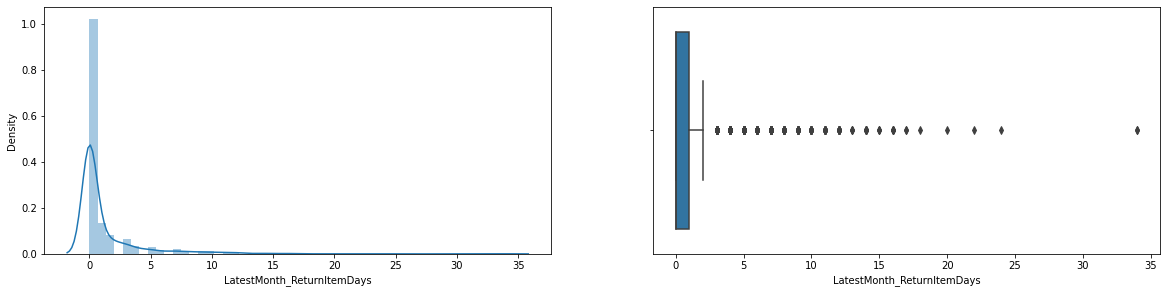

attribute_name : PctChangeInReveune
Description of attribute : 

count    2978.000000
mean       -0.157814
std         6.350104
min      -337.517455
25%        -0.078101
50%         0.072978
75%         0.234064
max         0.996664
Name: PctChangeInReveune, dtype: float64 

Value counts of attribute : 

 0.000000    51
 0.069956     1
 0.275083     1
 0.146601     1
 0.397467     1
             ..
-1.056519     1
 0.156495     1
-0.037607     1
-0.248886     1
-0.806881     1
Name: PctChangeInReveune, Length: 2928, dtype: int64 

Unique number of attribute : 

[ 0.06995631 -0.30428077  0.07591005 ...  0.06966408  0.2123607
 -0.80688105] 

Missing values in attribute : 

156 

Missing values in attribute_% : 

4.977664326738992 



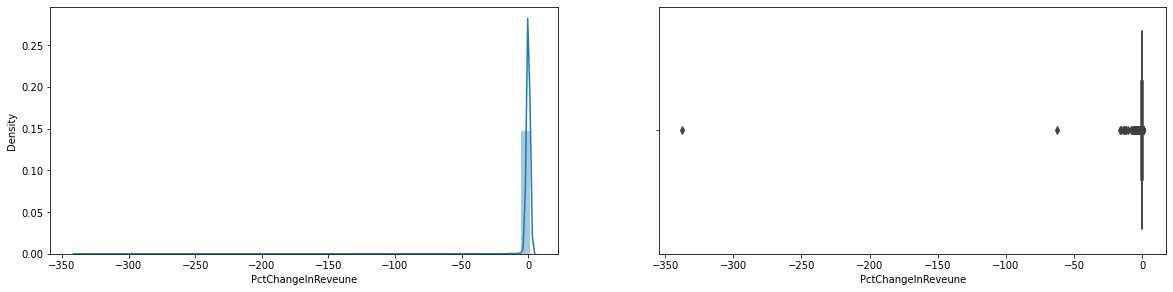

attribute_name : Renewal_PreviousAvgMonthRevenue
Description of attribute : 

count    3.001000e+03
mean     6.607614e+04
std      2.414144e+05
min      1.002600e+02
25%      1.509289e+04
50%      2.555369e+04
75%      5.370564e+04
max      9.840592e+06
Name: Renewal_PreviousAvgMonthRevenue, dtype: float64 

Value counts of attribute : 

12709.00     2
22342.35     2
39861.75     2
403775.76    2
34488.69     2
            ..
15917.67     1
8542.00      1
22665.11     1
10491.05     1
285940.39    1
Name: Renewal_PreviousAvgMonthRevenue, Length: 2955, dtype: int64 

Unique number of attribute : 

[  11215.09   28643.61  119022.   ... 2326013.95   28730.9   285940.39] 

Missing values in attribute : 

133 

Missing values in attribute_% : 

4.243777919591577 



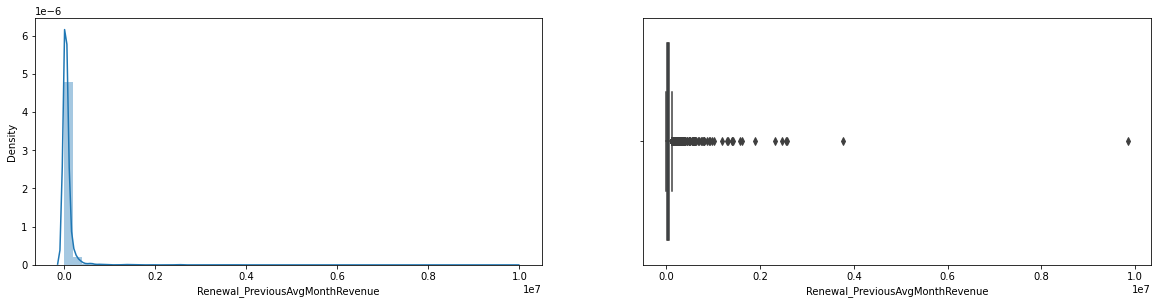

attribute_name : Renewal_PreviousAvgDailyBalance
Description of attribute : 

count    3.001000e+03
mean     1.080792e+04
std      5.250809e+04
min     -1.447103e+05
25%      1.714480e+03
50%      3.535520e+03
75%      7.940400e+03
max      2.450719e+06
Name: Renewal_PreviousAvgDailyBalance, dtype: float64 

Value counts of attribute : 

3820.25      2
512.11       2
202615.38    2
6292.94      2
4225.82      2
            ..
3234.67      1
3820.89      1
2651.60      1
2025.22      1
7115.19      1
Name: Renewal_PreviousAvgDailyBalance, Length: 2949, dtype: int64 

Unique number of attribute : 

[ 8271.55  4936.54  7773.77 ... -5826.55  1376.35  7115.19] 

Missing values in attribute : 

133 

Missing values in attribute_% : 

4.243777919591577 



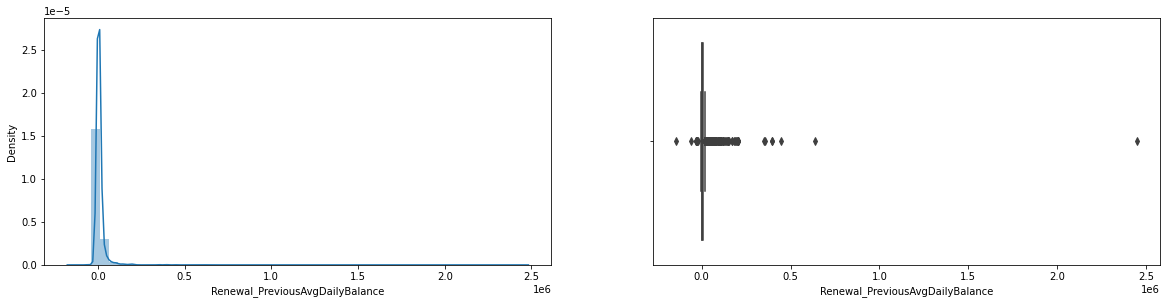

attribute_name : PctAvgDailybalance2AvgMonthlyDeposits
Description of attribute : 

count    3114.000000
mean        0.242426
std         2.628906
min        -0.255268
25%         0.063060
50%         0.118100
75%         0.213899
max       145.707261
Name: PctAvgDailybalance2AvgMonthlyDeposits, dtype: float64 

Value counts of attribute : 

2.049500    2
0.015758    2
0.223576    2
0.137212    2
0.178074    2
           ..
0.138031    1
0.070807    1
0.131635    1
0.158542    1
0.052477    1
Name: PctAvgDailybalance2AvgMonthlyDeposits, Length: 3106, dtype: int64 

Unique number of attribute : 

[0.44344277 0.08763853 0.07327735 ... 0.0224553  0.04684402 0.05247739] 

Missing values in attribute : 

20 

Missing values in attribute_% : 

0.6381620931716656 



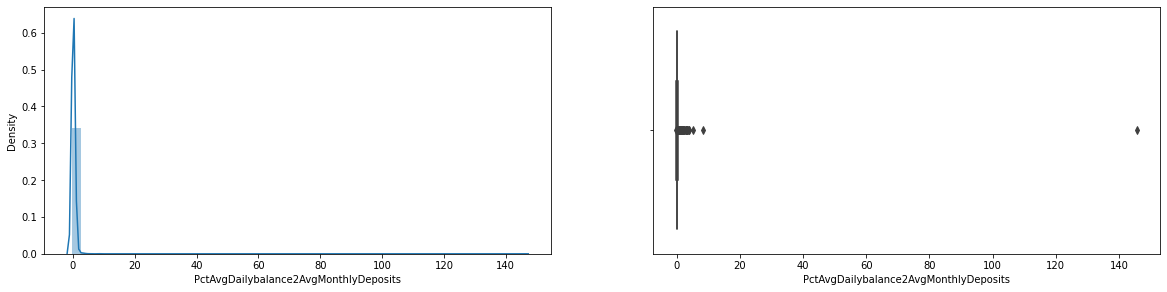

attribute_name : Avg_ReturnItemdays
Description of attribute : 

count    3114.000000
mean        0.900771
std         1.985325
min         0.000000
25%         0.000000
50%         0.000000
75%         0.750000
max        20.000000
Name: Avg_ReturnItemdays, dtype: float64 

Value counts of attribute : 

0.000000     1822
0.250000      166
0.333333      125
1.000000      107
0.666666      101
             ... 
15.666666       1
10.666666       1
13.000000       1
15.000000       1
19.000000       1
Name: Avg_ReturnItemdays, Length: 75, dtype: int64 

Unique number of attribute : 

[ 0.        7.        0.25      0.666666  3.        2.25      1.25
  1.333333  1.        5.666666  2.        3.666666  3.333333  0.333333
  2.5       2.333333  4.        9.666666  3.25      1.75      5.333333
  1.666666  0.5       7.333333 10.        3.5       8.666666  0.75
  6.        5.25      5.        7.5       4.666666  2.75      2.666666
  6.5       9.333333  8.75     12.             nan  3.75      4.7

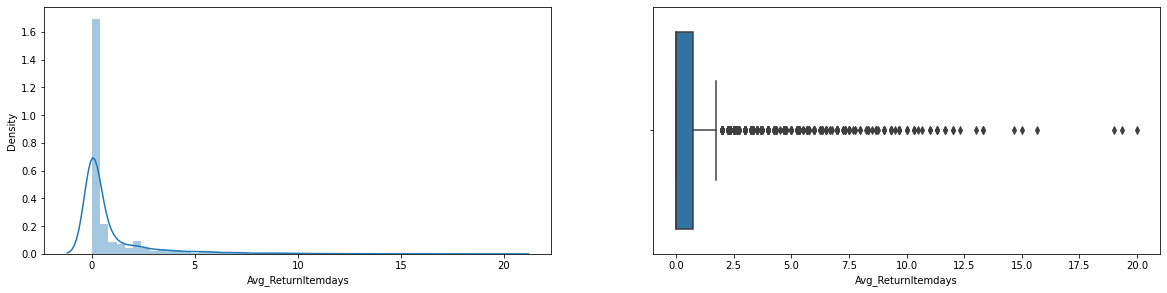

attribute_name : Last3Statments_MA_ReturnItemDays
Description of attribute : 

count    3114.000000
mean        0.894616
std         2.004056
min         0.000000
25%         0.000000
50%         0.000000
75%         0.666666
max        19.333333
Name: Last3Statments_MA_ReturnItemDays, dtype: float64 

Value counts of attribute : 

0.000000     1904
0.333333      272
0.666666      174
1.000000      129
1.333333       65
1.666666       57
2.000000       56
2.333333       55
3.000000       41
2.666666       41
3.666666       26
0.500000       23
4.333333       22
4.666666       21
3.333333       21
5.333333       20
4.000000       19
7.000000       14
6.000000       12
5.666666       11
5.000000       11
6.333333        9
2.500000        9
1.500000        9
7.333333        8
8.333333        8
6.666666        7
9.333333        6
10.333333       5
8.666666        5
3.500000        4
9.000000        4
6.500000        4
9.666666        4
10.000000       4
11.333333       3
12.333333       3


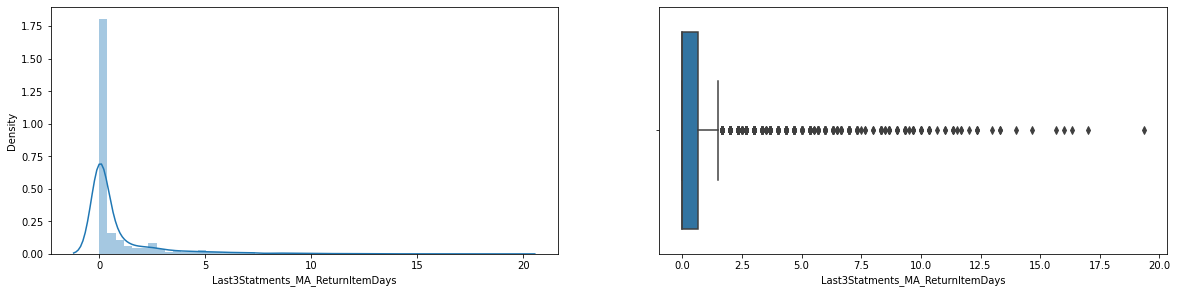

attribute_name : Last3Statments_MA_AvgDailyBalance
Description of attribute : 

count    3.114000e+03
mean     1.248086e+04
std      7.469546e+04
min     -1.365124e+05
25%      1.643703e+03
50%      3.552718e+03
75%      8.280294e+03
max      3.129067e+06
Name: Last3Statments_MA_AvgDailyBalance, dtype: float64 

Value counts of attribute : 

1398.103333     3
11290.460000    2
51776.233333    2
7960.176666     2
3008.666666     2
               ..
4702.290000     1
3317.450000     1
14535.550000    1
2123.233333     1
8274.890000     1
Name: Last3Statments_MA_AvgDailyBalance, Length: 3029, dtype: int64 

Unique number of attribute : 

[ 5347.333333  1924.65      8929.476666 ... 73852.153333  1921.29
  8274.89    ] 

Missing values in attribute : 

20 

Missing values in attribute_% : 

0.6381620931716656 



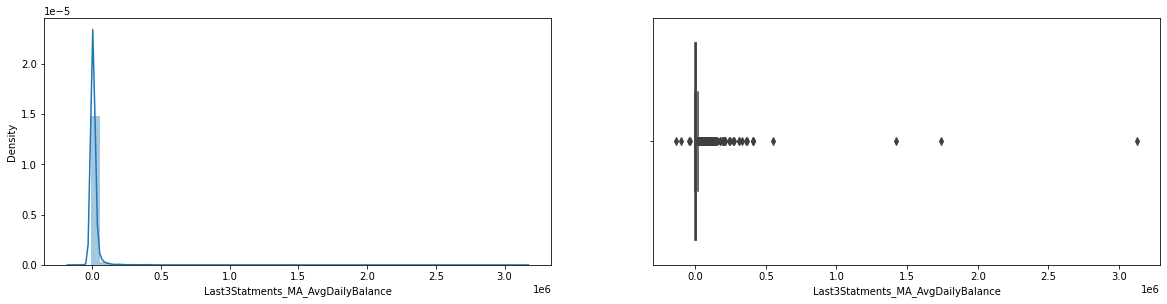

attribute_name : Last3Statments_MA_AdjustedMonthlyDeposits
Description of attribute : 

count    3.114000e+03
mean     7.967590e+04
std      3.378573e+05
min      1.002550e+02
25%      1.666662e+04
50%      2.936190e+04
75%      5.929628e+04
max      1.241704e+07
Name: Last3Statments_MA_AdjustedMonthlyDeposits, dtype: float64 

Value counts of attribute : 

57121.390000     2
31144.700000     2
38982.886666     2
29863.916666     2
49339.370000     2
                ..
76463.533333     1
48604.670000     1
20679.796666     1
14486.500000     1
183639.810000    1
Name: Last3Statments_MA_AdjustedMonthlyDeposits, Length: 3032, dtype: int64 

Unique number of attribute : 

[  12058.666666   21961.226666  116040.2      ... 2698584.04
   40926.01      183639.81    ] 

Missing values in attribute : 

20 

Missing values in attribute_% : 

0.6381620931716656 



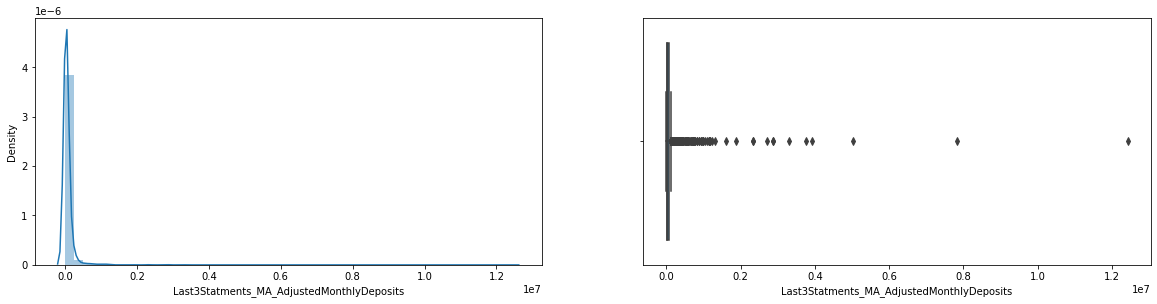

attribute_name : Renewal_PreviousPaidPercentageOfRTR
Description of attribute : 

count    3122.000000
mean        0.735058
std         0.252661
min         0.000000
25%         0.550000
50%         0.670000
75%         0.950000
max         2.150000
Name: Renewal_PreviousPaidPercentageOfRTR, dtype: float64 

Value counts of attribute : 

1.00    371
0.53    121
0.52    120
0.51    104
0.60     99
       ... 
1.29      1
1.72      1
1.69      1
1.51      1
1.58      1
Name: Renewal_PreviousPaidPercentageOfRTR, Length: 164, dtype: int64 

Unique number of attribute : 

[0.6  0.78 0.7  0.73 1.28 0.62 0.96 0.61 1.   0.66 0.57 0.75 0.5  0.56
 0.8  0.59 0.34 0.69 0.64 1.05 0.63 1.1  0.74 0.52 0.71 0.51 0.53 0.67
 0.54 0.76 0.79 0.68 0.44 0.89 0.58 0.45 1.38 0.85 1.55 0.97 1.14 0.65
 0.72 0.55 0.94 1.07 0.18 1.02 1.3  0.84 0.93 1.01 1.6  0.92 1.21 0.43
 1.03 0.77 0.35 0.88 0.31 0.81 0.48 0.82 0.49 1.42 0.2  1.41 0.91 0.87
 0.98 1.22 1.16 0.38 1.76 1.31 1.13 0.36 0.95 1.45 0.47 0.9  0.16 1.06


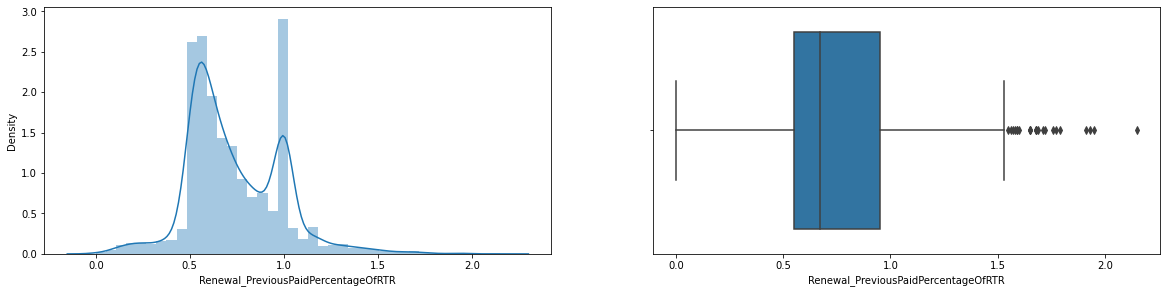

attribute_name : AdjustedMonthlyDeposits
Description of attribute : 

count    3.119000e+03
mean     7.682501e+04
std      3.505075e+05
min     -1.790000e+02
25%      1.548338e+04
50%      2.915770e+04
75%      5.959522e+04
max      1.585575e+07
Name: AdjustedMonthlyDeposits, dtype: float64 

Value counts of attribute : 

0.00         6
10027.00     3
87808.00     2
8093.00      2
42605.28     2
            ..
13525.00     1
39009.00     1
12681.66     1
82281.40     1
111517.43    1
Name: AdjustedMonthlyDeposits, Length: 3089, dtype: int64 

Unique number of attribute : 

[  13166.     22175.9   110731.   ... 2737133.13   41454.3   111517.43] 

Missing values in attribute : 

15 

Missing values in attribute_% : 

0.4786215698787492 



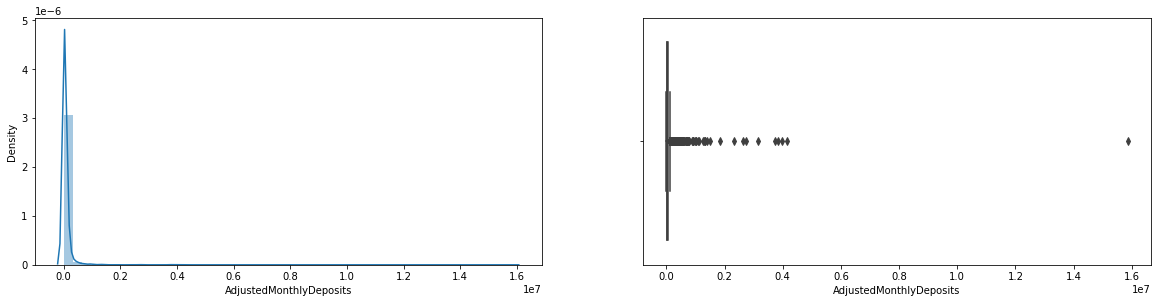

attribute_name : Credit_Score__c
Description of attribute : 

count    3122.000000
mean      549.540359
std       153.810362
min         0.000000
25%       532.000000
50%       578.000000
75%       622.000000
max       815.000000
Name: Credit_Score__c, dtype: float64 

Value counts of attribute : 

0.0      164
595.0     32
550.0     30
1.0       30
578.0     28
        ... 
748.0      1
759.0      1
755.0      1
742.0      1
702.0      1
Name: Credit_Score__c, Length: 319, dtype: int64 

Unique number of attribute : 

[569. 601. 657.   0. 556. 667. 482. 565. 517. 678. 638. 611. 521. 520.
 621. 570. 576. 558. 626. 535. 562. 544. 497. 754. 616. 543. 581. 778.
 496. 586. 516. 642. 604. 617. 815. 602. 677. 515. 552. 531. 588. 454.
 594. 595. 672. 688. 615. 582. 484. 736. 547. 550. 634. 579. 584. 466.
 723. 583. 598. 523. 628. 592. 545. 671. 527. 603. 654. 485. 475. 596.
 557. 700. 643. 436. 589. 578. 553. 567. 607. 568. 609. 670. 509. 641.
 554. 668. 605. 495. 618. 606. 504. 563. 704. 646

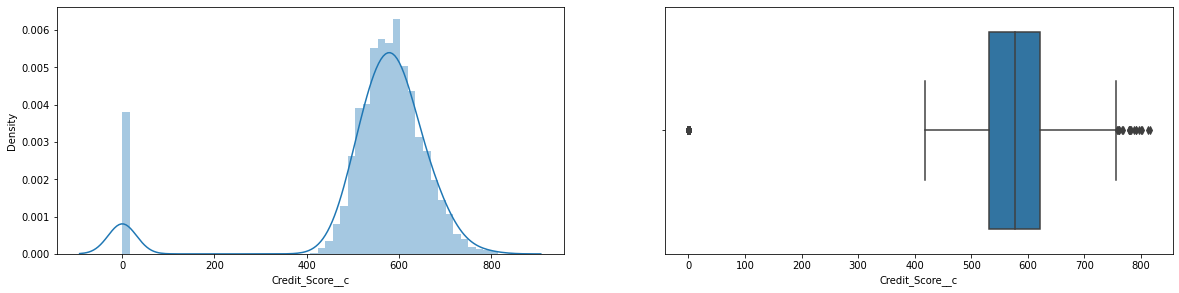

attribute_name : Renewal_PreviousPace
Description of attribute : 

count    3122.000000
mean       98.415548
std         6.317369
min        30.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: Renewal_PreviousPace, dtype: float64 

Value counts of attribute : 

100.00    2806
88.00        4
77.27        3
96.01        3
90.00        2
          ... 
97.73        1
67.13        1
94.74        1
83.93        1
80.22        1
Name: Renewal_PreviousPace, Length: 289, dtype: int64 

Unique number of attribute : 

[ 90.    96.88 100.    96.97  61.    90.24  94.12  74.9   99.56  96.67
  68.    97.46  95.56  92.    71.97  55.47  91.4   98.33  91.27  69.23
  68.37  94.29  82.54  93.77  91.67  67.14  71.23  61.4   90.95  79.55
  44.15  89.25  81.95  98.08  78.96  92.59  87.62  88.37  87.8   83.09
  68.08  87.35  93.75  98.65  99.64  81.18  91.17  85.55  96.01  52.57
  88.89  97.5   99.38  77.93    nan  93.25  63.08  72.24  91.53  99.92
  78.    42.

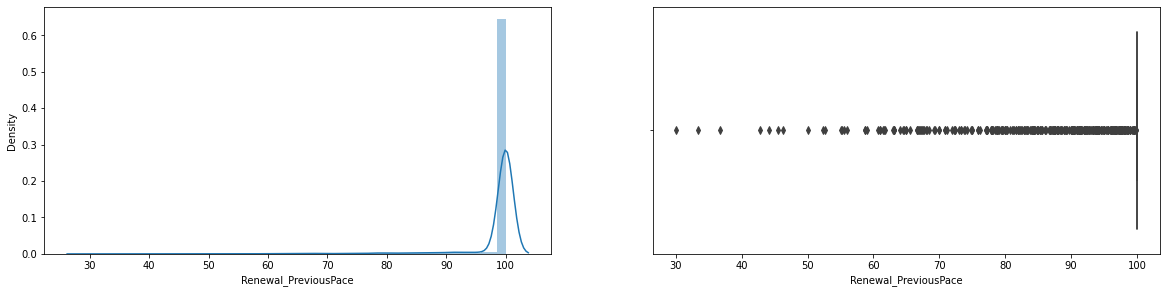

attribute_name : drop_percent
Description of attribute : 

count    3118.000000
mean       11.420672
std       114.074972
min      -384.435096
25%       -30.338174
50%        -5.335185
75%        27.904786
max      3000.881057
Name: drop_percent, dtype: float64 

Value counts of attribute : 

-24.476489     3
 34.553997     2
-33.966396     2
-14.774684     2
-39.375898     2
              ..
-53.001182     1
 123.535245    1
-12.775703     1
-42.054610     1
-52.833510     1
Name: drop_percent, Length: 3103, dtype: int64 

Unique number of attribute : 

[ 14.437201   1.473467 -16.208039 ...  24.515888  11.500671 -52.83351 ] 

Missing values in attribute : 

16 

Missing values in attribute_% : 

0.5105296745373326 



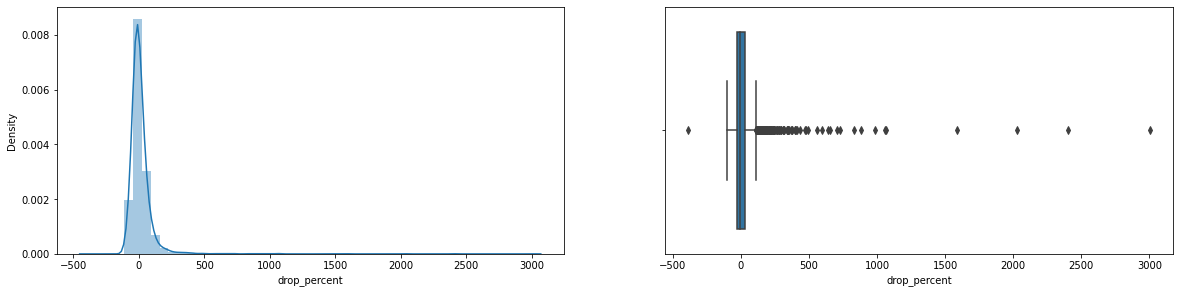

attribute_name : TwoMonthAvg_AdjustedMonthlyDeposits
Description of attribute : 

count    3.118000e+03
mean     7.827238e+04
std      2.371606e+05
min     -6.656000e+03
25%      1.747244e+04
50%      3.066749e+04
75%      6.264089e+04
max      5.447013e+06
Name: TwoMonthAvg_AdjustedMonthlyDeposits, dtype: float64 

Value counts of attribute : 

13276.658750     3
65258.556250     2
144718.764666    2
126118.972500    2
70277.787500     2
                ..
28511.363636     1
6050.500000      1
44722.625000     1
21885.543571     1
236433.597777    1
Name: TwoMonthAvg_AdjustedMonthlyDeposits, Length: 3102, dtype: int64 

Unique number of attribute : 

[  11505.         21853.89      132149.9125   ... 2198219.97
   37178.525     236433.597777] 

Missing values in attribute : 

16 

Missing values in attribute_% : 

0.5105296745373326 



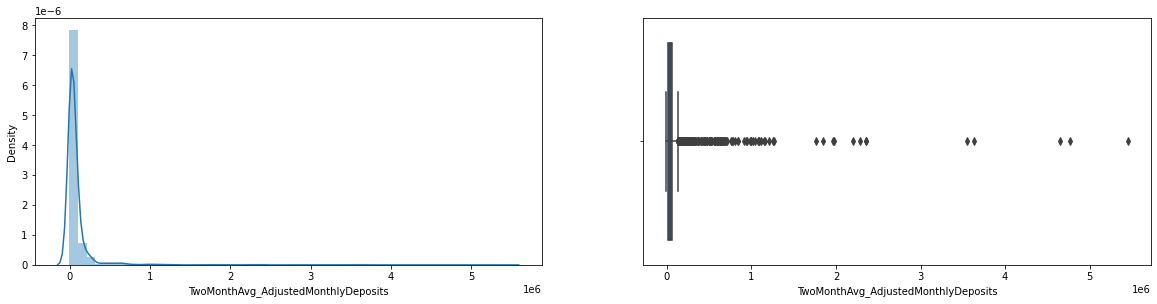

In [ ]:
missing_attributes = ['LatestMonth_ReturnItemDays', 
                      'PctChangeInReveune', 
                      'Renewal_PreviousAvgMonthRevenue',
                      'Renewal_PreviousAvgDailyBalance',
                      'PctAvgDailybalance2AvgMonthlyDeposits',
                      'Avg_ReturnItemdays',
                      "Last3Statments_MA_ReturnItemDays",
                      "Last3Statments_MA_AvgDailyBalance",
                      'Last3Statments_MA_AdjustedMonthlyDeposits',
                      'Renewal_PreviousPaidPercentageOfRTR', 
                      'AdjustedMonthlyDeposits',                                              
                      'Credit_Score__c',                          
                      'Renewal_PreviousPace',
                      'drop_percent',
                      'TwoMonthAvg_AdjustedMonthlyDeposits']    

for col in missing_attributes:
  print('\033[1m'+'attribute_name :', col+'\033[0m')
  attribute_info(data[col])

In [ ]:
missing_attributes = ['LatestMonth_ReturnItemDays', 
                      'PctChangeInReveune', 
                      'Renewal_PreviousAvgMonthRevenue',
                      'Renewal_PreviousAvgDailyBalance',
                      'PctAvgDailybalance2AvgMonthlyDeposits',
                      'Avg_ReturnItemdays',
                      "Last3Statments_MA_ReturnItemDays",
                      "Last3Statments_MA_AvgDailyBalance",
                      'Last3Statments_MA_AdjustedMonthlyDeposits',
                      'Renewal_PreviousPaidPercentageOfRTR', 
                      'AdjustedMonthlyDeposits',                                              
                      'Credit_Score__c',                          
                      'Renewal_PreviousPace',
                      'drop_percent',
                      'TwoMonthAvg_AdjustedMonthlyDeposits']  

In [ ]:
print('LatestMonth_ReturnItemDays :                   ', data['LatestMonth_ReturnItemDays'].median())
print('PctChangeInReveune :                           ', data['PctChangeInReveune'].median())
print('Renewal_PreviousAvgMonthRevenue :              ', data['Renewal_PreviousAvgMonthRevenue'].median())
print('Renewal_PreviousAvgDailyBalance :              ', data['Renewal_PreviousAvgDailyBalance'].median())
print('PctAvgDailybalance2AvgMonthlyDeposits :        ', data['PctAvgDailybalance2AvgMonthlyDeposits'].median())
print('Avg_ReturnItemdays :                           ', data['Avg_ReturnItemdays'].median())
print('Last3Statments_MA_ReturnItemDays :             ', data['Last3Statments_MA_ReturnItemDays'].median())
print('Last3Statments_MA_AvgDailyBalance :            ', data['Last3Statments_MA_AvgDailyBalance'].median())
print('Last3Statments_MA_AdjustedMonthlyDeposits :    ', data['Last3Statments_MA_AdjustedMonthlyDeposits'].median())
print('Renewal_PreviousPaidPercentageOfRTR :          ', data['Renewal_PreviousPaidPercentageOfRTR'].median())
print('AdjustedMonthlyDeposits :                      ', data['AdjustedMonthlyDeposits'].median())
print('Renewal_PreviousPace :                         ', data['Renewal_PreviousPace'].median())
print('drop_percent :                                 ', data['drop_percent'].median())
print('TwoMonthAvg_AdjustedMonthlyDeposits :          ', data['TwoMonthAvg_AdjustedMonthlyDeposits'].median())


LatestMonth_ReturnItemDays :                    0.0
PctChangeInReveune :                            0.0729781970417135
Renewal_PreviousAvgMonthRevenue :               25553.69
Renewal_PreviousAvgDailyBalance :               3535.52
PctAvgDailybalance2AvgMonthlyDeposits :         0.1180997501225475
Avg_ReturnItemdays :                            0.0
Last3Statments_MA_ReturnItemDays :              0.0
Last3Statments_MA_AvgDailyBalance :             3552.718333
Last3Statments_MA_AdjustedMonthlyDeposits :     29361.903333000002
Renewal_PreviousPaidPercentageOfRTR :           0.67
AdjustedMonthlyDeposits :                       29157.7
Renewal_PreviousPace :                          100.0
drop_percent :                                  -5.3351845
TwoMonthAvg_AdjustedMonthlyDeposits :           30667.489230500003


In [ ]:
credit_mean = data[(data['Credit_Score__c'] != 0) & (data['Credit_Score__c'] != 1)]['Credit_Score__c'].mean()
credit_mean

585.9409153005464

In [ ]:
data['Renewal_PreviousPaidPercentageOfRTR'].fillna(data['Renewal_PreviousPaidPercentageOfRTR'].median(), inplace = True)
data['LatestMonth_ReturnItemDays'].fillna(data['LatestMonth_ReturnItemDays'].median(),inplace = True)
data['PctChangeInReveune'].fillna(data['PctChangeInReveune'].median(),inplace = True)
data['PctAvgDailybalance2AvgMonthlyDeposits'].fillna(data['PctAvgDailybalance2AvgMonthlyDeposits'].median(),inplace = True)
data['Avg_ReturnItemdays'].fillna(data['Avg_ReturnItemdays'].median(),inplace = True)
data['Renewal_PreviousAvgMonthRevenue'].fillna(data['Renewal_PreviousAvgMonthRevenue'].median(),inplace = True)
data['Renewal_PreviousAvgDailyBalance'].fillna(data['Renewal_PreviousAvgDailyBalance'].median(),inplace = True)
data['Renewal_PreviousPace'].fillna(data['Renewal_PreviousPace'].median(),inplace = True)
data['drop_percent'].fillna(data['drop_percent'].median(),inplace = True)
data['TwoMonthAvg_AdjustedMonthlyDeposits'].fillna(data['TwoMonthAvg_AdjustedMonthlyDeposits'].median(),inplace = True)
data['AdjustedMonthlyDeposits'].fillna(data['AdjustedMonthlyDeposits'].median(),inplace = True)

data['Last3Statments_MA_ReturnItemDays'].fillna(data['Last3Statments_MA_ReturnItemDays'].median(),inplace = True)
data['Last3Statments_MA_AvgDailyBalance'].fillna(data['Last3Statments_MA_AvgDailyBalance'].median(),inplace = True)
data['Last3Statments_MA_AdjustedMonthlyDeposits'].fillna(data['Last3Statments_MA_AdjustedMonthlyDeposits'].median(),inplace = True)



In [ ]:
credit_mean = data[(data['Credit_Score__c'] != 0) & (data['Credit_Score__c'] != 1)]['Credit_Score__c'].mean()
credit_mean

585.9409153005464

In [ ]:
data['Credit_Score__c'].fillna(credit_mean,inplace = True)

Description of attribute : 

count    3134.000000
mean      549.679735
std       153.531983
min         0.000000
25%       532.000000
50%       578.000000
75%       621.750000
max       815.000000
Name: Credit_Score__c, dtype: float64 

Value counts of attribute : 

0.0      164
595.0     32
550.0     30
1.0       30
578.0     28
        ... 
768.0      1
748.0      1
759.0      1
755.0      1
702.0      1
Name: Credit_Score__c, Length: 320, dtype: int64 

Unique number of attribute : 

[569.        601.        657.          0.        556.        667.
 482.        565.        517.        678.        638.        611.
 521.        520.        621.        570.        576.        558.
 626.        535.        562.        544.        497.        754.
 616.        543.        581.        778.        496.        586.
 516.        642.        604.        617.        815.        602.
 677.        515.        552.        531.        588.        454.
 594.        595.        672.        688.     

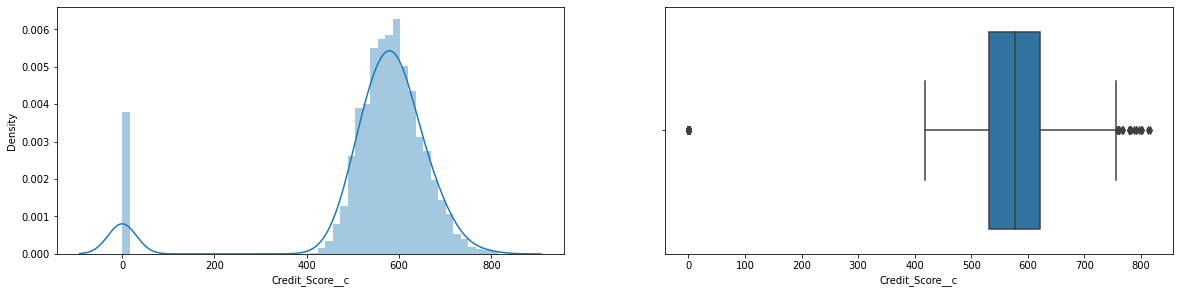

In [ ]:
attribute_info(data['Credit_Score__c'])

In [ ]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

OpportunityID                                 0.0
Industry_Construction                         0.0
WOGross_AdvanceBalance                        0.0
Avg_ReturnItemdays                            0.0
LatestMonth_ReturnItemDays                    0.0
PctChangeInReveune                            0.0
PctAvgDailybalance2AvgMonthlyDeposits         0.0
TwoMonthAvg_AdjustedMonthlyDeposits           0.0
AdjustedMonthlyDeposits                       0.0
drop_percent                                  0.0
Is_this_Business_home_based__c_Yes            0.0
Industry_E-Commerce                           0.0
Renewal_PreviousPace                          0.0
Industry_Finance, Insurance, Real Estate      0.0
Industry_Manufacturing                        0.0
Industry_Mining                               0.0
Industry_Retail                               0.0
Industry_Services                             0.0
Industry_Transportation & Public Utilities    0.0
Industry_Wholesale                            0.0


In [ ]:
data.to_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v10/v10_after_eda_bankst.xlsx', index = False)